# Challenge: Preparing a dataset for modeling

1. Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

2. Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

3. Finally, use filtering methods to select the five best features and justify your choices.

<img src='logo.png'>

The data contains complete loan data for all loans issued through 2007-2015.

In [9]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
%matplotlib inline

In [34]:
#Bring In Data
data = pd.read_csv('loan.csv', low_memory=False)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Exploration - Which features should I select?

#### Assumptions

1. Based on gut, Im assuming that the loan amount, interest rate, installment, annual income,sub grade and home ownership will be interesting features.

2. The sub grade, will already account for a lot of the features, so there is correlation.

#### How many variables?

In [8]:
len(data.columns)

74

#### How many datapoints?

In [9]:
#This shows how many datapoints, how many nulls and the datatypes for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [35]:
#Drop columns that dont meet the threshold
#Need to look at the process why the data was missing. 
data = data.dropna(axis=1, thresh=887370)

In [36]:
#Number of attributes/vvariables that are reduced because of the dropping
len(data.columns)

36

#### Plotting Variables

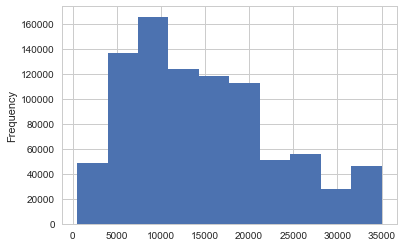

In [12]:
data['loan_amnt'].plot(kind='hist')

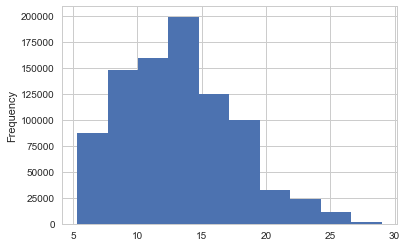

In [13]:
data['int_rate'].plot(kind='hist')

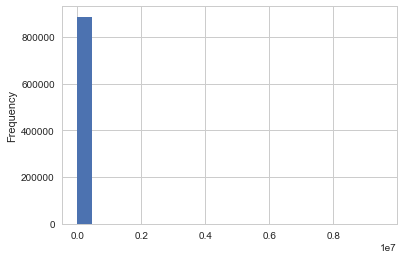

In [15]:
#This plot means there are outliers in the annual income. Lets explore this further with a box plot
data['annual_inc'].plot(kind='hist', bins=20)

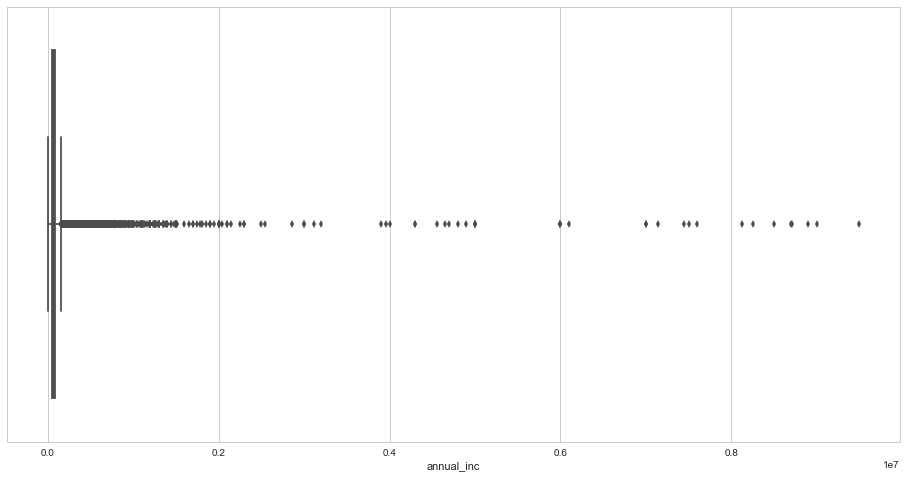

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(data['annual_inc'])

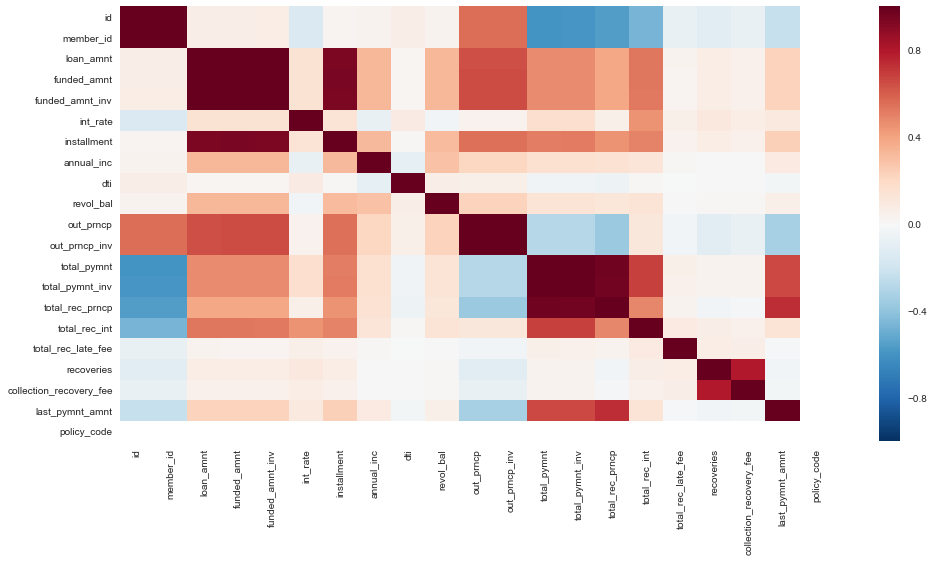

In [37]:
plt.figure(figsize=(16,8))
datacorr = data.corr()
sns.heatmap(datacorr)

Did expect to use installment, but its very correlated to the loan amount, and therefore doenst provide much value in having it. WIll use revolving balance instead.

### Selecting Outcome Variable

'Default' will be the outcome variable. This will encompass the Default Status and Charged Off. But have to take several steps to accomplish this.

1. Clean up the data 
2. Select subset of attributes
2. Create the features dataset

In [12]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [51]:
#Clean up
#Removed Does not meet credit policies
cleaned_data = data[~((data['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid') |
                      (data['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'))]

cleaned_data['term_months'] = cleaned_data['term'].str.replace('months','')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Creating Features

In [52]:
#Select attributes. This is a subset of the 36 attributes in the data
attributes = cleaned_data[['sub_grade','term_months','home_ownership', 'loan_amnt','int_rate', 'revol_bal','annual_inc']]

In [53]:
#Create categorical features based on sub grade, term months and home ownership
features = pd.get_dummies(attributes)

In [54]:
#Set outcome
features['Default'] = np.where((cleaned_data['loan_status'].isin(['Default','Charged Off'])),1,0)

In [55]:
features.head()

,loan_amnt,int_rate,revol_bal,annual_inc,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,...,sub_grade_G5,term_months_ 36,term_months_ 60,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,Default
0,5000.0,10.65,13648.0,24000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2500.0,15.27,1687.0,30000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2400.0,15.96,2956.0,12252.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,10000.0,13.49,5598.0,49200.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3000.0,12.69,27783.0,80000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
